Google form link: https://forms.gle/sWRjHobwqndLt2iN7

# Stats for Data Analytics: CA1

You are required to collect, process, analyse and interpret the data in order to identify and recommend
possible solutions for a specific problem. (Examples like: house energy consumption, time for exercises,
healthy food, etc.. ) using descriptive statistics. 

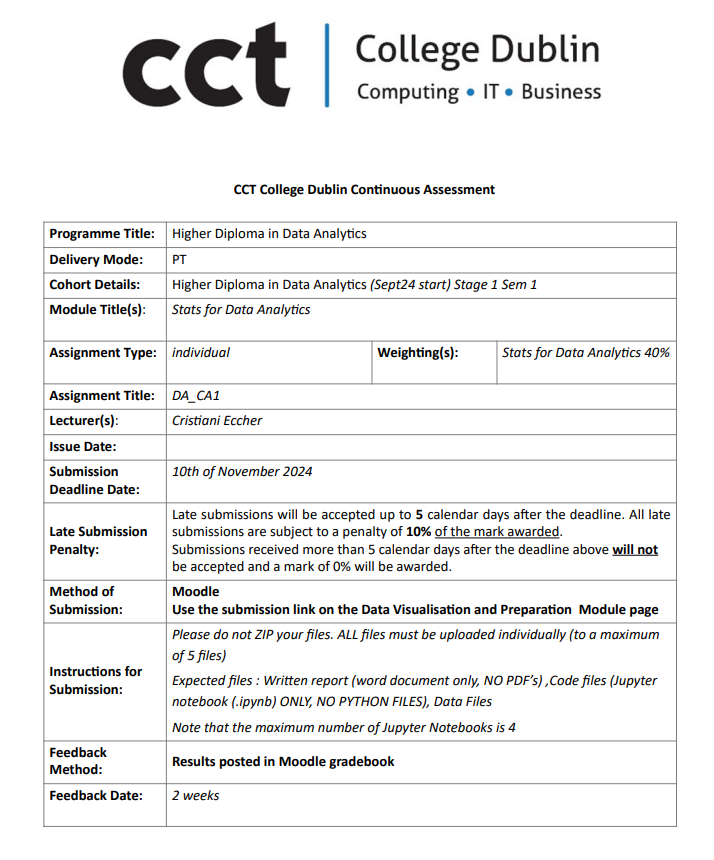

In [757]:
from IPython.display import Image

Image(filename="cover.png")

In [705]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading
data = pd.read_excel('Data_CA1.xlsx')

data.head()


,Timestamp,Score,Do you believe in God?,What is your birth Nationality?,Gender at birth,Do your parents believe in Jesus Christ as God?,Would you say that Jesus of Nazareth is the Messiah?,(Number) How old are you now?,(Number) How old were you when you first heard of Jesus?,How would you describe your personal relationship with Jesus?,...,"What does the title ""Jesus as Lord"" mean to you personally?",Do you believe that Jesus is actively involved in your life today?,How often do you pray in Jesus' name for guidance or support?,What impact does the belief in Jesus as Savior have on your sense of purpose?,How important is Jesus’ resurrection to your faith?,Do you view Jesus as a model for living a moral and righteous life?,How does Jesus’ command to love others affect your worldview?,What do you not like about Jesus?,"At that time, being crucified would be the same as today being condemned to death row. Why did they want to crucify him?",(Please use decimals) from 1% to 100%. What are the probabilities of believing God wants to have a personal relationship with you?
0,2024-10-13 13:19:55.503,0,Yes,Venezuela,Male,Yes,"Yes, He fulfills the prophesies from the Jewis...",29,10,Intimate,...,"He Is my Savior, my Lord, my Redeemer, He Is m...",Yes,Daily,1,1,1,1,"None, I love Jesus., I have nothing against Him",He proclaimed to be God,100
1,2024-10-13 13:34:29.446,0,I do not know,Irish,Female,Yes,I have no idea about the subject,40,4,Unsure,...,Religion,No,Never,4,2,3,2,Saying He is the only way to heaven.,He proclaimed to be God,0.20
2,2024-10-13 13:36:41.550,0,No,Portuguese,Male,No,I have no idea about the subject,42,As soon as I was in school…5 or 6,Non-existent,...,I don’t believe in any religion,No,Never,5,5,5,5,Never see him,He proclaimed to be God,0
3,2024-10-13 13:36:54.771,0,Yes,Irish,Female,I do not know,I have no idea about the subject,51,10,Distant,...,Nothing,I do not know,Rarely,3,5,5,5,I have nothing against Him,He proclaimed to be God,0.01
4,2024-10-13 13:45:36.805,0,Yes,Brazil,Female,Yes,I have no idea about the subject,28,0,Growing,...,Dont think about this,Yes,Rarely,4,1,3,3,His followers.,He was a criminal,100


## Data Preparation

In [706]:
# Dropping unnecesary Score column
data = data.drop(columns=['Score'])


In [707]:
# Renaming columns to simpler versions
data.columns = [
    'Date',  # Timestamp
    'Believing_in_God',  # Do you believe in God?
    'Nationality',  # What is your birth Nationality?
    'Gender',  # Gender at birth
    'Parents_believed_Jesus',  # Do your parents believe in Jesus Christ as God?
    'Jesus_as_Messiah',  # Would you say that Jesus of Nazareth is the Messiah?
    'Current_Age',  # (Number) How old are you now?
    'First_Heard_of_Jesus',  # (Number) How old were you when you first heard of Jesus?
    'Relationship_with_Jesus',  # How would you describe your personal relationship with Jesus?
    'Life_Decisions_Influence',  # How has your understanding of Jesus shaped your life decisions?
    'Applicable_Jesus_Teachings',  # What aspect of Jesus' teachings do you find most applicable in your daily life?
    'Jesus_as_Lord_Meaning',  # What does the title "Jesus as Lord" mean to you personally?
    'Jesus_Involvement_Today',  # Do you believe that Jesus is actively involved in your life today?
    'Prayer_Frequency',  # How often do you pray in Jesus' name for guidance or support?
    'Savior_Impact_on_Purpose',  # What impact does the belief in Jesus as Savior have on your sense of purpose?
    'Resurrection_Importance',  # How important is Jesus’ resurrection to your faith?
    'Jesus_as_Moral_Model',  # Do you view Jesus as a model for living a moral and righteous life?
    'Love_Command_Affect',  # How does Jesus’ command to love others affect your worldview?
    'Dislikes_about_Jesus',  # What do you not like about Jesus?
    'Crucifixion_Reason',  # Why did they want to crucify him?
    'Belief_Probability'  # What are the probabilities of believing God wants to have a personal relationship with you?
]


Dealing with Null values

In [708]:
null_counts = data.isnull().sum()

print(null_counts)


Date                          0
Believing_in_God              0
Nationality                   0
Gender                        0
Parents_believed_Jesus        0
Jesus_as_Messiah              0
Current_Age                   0
First_Heard_of_Jesus          0
Relationship_with_Jesus       0
Life_Decisions_Influence      0
Applicable_Jesus_Teachings    4
Jesus_as_Lord_Meaning         1
Jesus_Involvement_Today       0
Prayer_Frequency              0
Savior_Impact_on_Purpose      0
Resurrection_Importance       0
Jesus_as_Moral_Model          0
Love_Command_Affect           0
Dislikes_about_Jesus          0
Crucifixion_Reason            0
Belief_Probability            0
dtype: int64


Best practices:

In [709]:
# Filling missing values in 'Applicable_Jesus_Teachings' with mode
data['Applicable_Jesus_Teachings'].fillna(data['Applicable_Jesus_Teachings'].mode()[0], inplace=True)

# Filling missing values in 'Jesus_as_Lord_Meaning' with "No Response"
data['Jesus_as_Lord_Meaning'].fillna("No Response", inplace=True)

# Check
print(data.isnull().sum())


Date                          0
Believing_in_God              0
Nationality                   0
Gender                        0
Parents_believed_Jesus        0
Jesus_as_Messiah              0
Current_Age                   0
First_Heard_of_Jesus          0
Relationship_with_Jesus       0
Life_Decisions_Influence      0
Applicable_Jesus_Teachings    0
Jesus_as_Lord_Meaning         0
Jesus_Involvement_Today       0
Prayer_Frequency              0
Savior_Impact_on_Purpose      0
Resurrection_Importance       0
Jesus_as_Moral_Model          0
Love_Command_Affect           0
Dislikes_about_Jesus          0
Crucifixion_Reason            0
Belief_Probability            0
dtype: int64


In [710]:
# Basic information about the dataset
data.info()

# Numeric and categorical variables info
data.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        39 non-null     datetime64[ns]
 1   Believing_in_God            39 non-null     object        
 2   Nationality                 39 non-null     object        
 3   Gender                      39 non-null     object        
 4   Parents_believed_Jesus      39 non-null     object        
 5   Jesus_as_Messiah            39 non-null     object        
 6   Current_Age                 39 non-null     int64         
 7   First_Heard_of_Jesus        39 non-null     object        
 8   Relationship_with_Jesus     39 non-null     object        
 9   Life_Decisions_Influence    39 non-null     object        
 10  Applicable_Jesus_Teachings  39 non-null     object        
 11  Jesus_as_Lord_Meaning       39 non-null     object        
 

,Date,Believing_in_God,Nationality,Gender,Parents_believed_Jesus,Jesus_as_Messiah,Current_Age,First_Heard_of_Jesus,Relationship_with_Jesus,Life_Decisions_Influence,...,Jesus_as_Lord_Meaning,Jesus_Involvement_Today,Prayer_Frequency,Savior_Impact_on_Purpose,Resurrection_Importance,Jesus_as_Moral_Model,Love_Command_Affect,Dislikes_about_Jesus,Crucifixion_Reason,Belief_Probability
count,39,39,39,39,39,39,39.00,39.00,39,39,...,39,39,39,39.00,39.00,39.00,39.00,39,39,39.00
unique,NaN,3,26,2,3,4,NaN,15.00,5,4,...,35,3,5,NaN,NaN,NaN,NaN,10,2,15.00
top,NaN,Yes,Irish,Female,Yes,"Yes, He fulfills the prophesies from the Jewis...",NaN,5.00,Intimate,Greatly influenced,...,Nothing,Yes,Daily,NaN,NaN,NaN,NaN,I have nothing against Him,He proclaimed to be God,100.00
freq,NaN,29,7,20,26,17,NaN,10.00,16,19,...,3,20,17,NaN,NaN,NaN,NaN,16,38,17.00
mean,2024-10-19 16:44:01.547820544,NaN,NaN,NaN,NaN,NaN,38.77,NaN,NaN,NaN,...,NaN,NaN,NaN,3.18,3.13,2.95,2.85,NaN,NaN,NaN
min,2024-10-13 13:19:55.503000,NaN,NaN,NaN,NaN,NaN,23.00,NaN,NaN,NaN,...,NaN,NaN,NaN,1.00,1.00,1.00,1.00,NaN,NaN,NaN
25%,2024-10-14 16:25:47.112999936,NaN,NaN,NaN,NaN,NaN,32.00,NaN,NaN,NaN,...,NaN,NaN,NaN,1.00,1.00,1.00,1.00,NaN,NaN,NaN
50%,2024-10-22 08:39:55.900999936,NaN,NaN,NaN,NaN,NaN,39.00,NaN,NaN,NaN,...,NaN,NaN,NaN,4.00,4.00,3.00,3.00,NaN,NaN,NaN
75%,2024-10-22 08:54:09.636999936,NaN,NaN,NaN,NaN,NaN,44.50,NaN,NaN,NaN,...,NaN,NaN,NaN,5.00,5.00,4.00,4.50,NaN,NaN,NaN
max,2024-10-22 20:55:30.225000,NaN,NaN,NaN,NaN,NaN,61.00,NaN,NaN,NaN,...,NaN,NaN,NaN,5.00,5.00,5.00,5.00,NaN,NaN,NaN


Lets convert "First_Heard_of_Jesus" object to its actual integer

First lets deal with an anomaly in the data


In [711]:
print("Input from the third row in 'First_Heard_of_Jesus' column:", data.iloc[2]["First_Heard_of_Jesus"])

Input from the third row in 'First_Heard_of_Jesus' column: As soon as I was in school…5 or 6


Children starts normally school at 5 so lets place 5

In [712]:
data.iloc[2, data.columns.get_loc("First_Heard_of_Jesus")] = 5

In [713]:
# Check
print("After change:", data.iloc[2]["First_Heard_of_Jesus"])

After change: 5


Lets continue...

In [714]:
data["First_Heard_of_Jesus"] = pd.to_numeric(data["First_Heard_of_Jesus"], errors='coerce').astype('Int64')

In [715]:
# Checking
print(data['First_Heard_of_Jesus'].dtype)

Int64


"Belief_Probability" Converting to float.

In [716]:
data['Belief_Probability'] = pd.to_numeric(data['Belief_Probability'], errors='coerce')


In [717]:
# Check
print(data['Belief_Probability'].dtype)


float64


## Descriptive Analysis

### Numerical Columns

In [718]:
data.describe()

,Date,Current_Age,First_Heard_of_Jesus,Savior_Impact_on_Purpose,Resurrection_Importance,Jesus_as_Moral_Model,Love_Command_Affect,Belief_Probability
count,39,39.00,39.00,39.00,39.00,39.00,39.00,38.00
mean,2024-10-19 16:44:01.547820544,38.77,6.97,3.18,3.13,2.95,2.85,62.65
min,2024-10-13 13:19:55.503000,23.00,0.00,1.00,1.00,1.00,1.00,0.00
25%,2024-10-14 16:25:47.112999936,32.00,4.00,1.00,1.00,1.00,1.00,1.00
50%,2024-10-22 08:39:55.900999936,39.00,5.00,4.00,4.00,3.00,3.00,99.99
75%,2024-10-22 08:54:09.636999936,44.50,7.00,5.00,5.00,4.00,4.50,100.00
max,2024-10-22 20:55:30.225000,61.00,33.00,5.00,5.00,5.00,5.00,100.00
std,NaN,8.75,6.17,1.71,1.84,1.54,1.60,45.84


### Categorical Columns

In [719]:
data.describe(include='object')

,Believing_in_God,Nationality,Gender,Parents_believed_Jesus,Jesus_as_Messiah,Relationship_with_Jesus,Life_Decisions_Influence,Applicable_Jesus_Teachings,Jesus_as_Lord_Meaning,Jesus_Involvement_Today,Prayer_Frequency,Dislikes_about_Jesus,Crucifixion_Reason
count,39,39,39,39,39,39,39,39,39,39,39,39,39
unique,3,26,2,3,4,5,4,18,35,3,5,10,2
top,Yes,Irish,Female,Yes,"Yes, He fulfills the prophesies from the Jewis...",Intimate,Greatly influenced,"Love, Forgiveness, Humility, Service, Sacrific...",Nothing,Yes,Daily,I have nothing against Him,He proclaimed to be God
freq,29,7,20,26,17,16,19,13,3,20,17,16,38


Interesting results

### Measures of Central Tendency

In [720]:
# Mean, Median, Mode for numerical columns

mean_values = data.mean(numeric_only=True)
median_values = data.median(numeric_only=True)
mode_values = data.mode().iloc[0]

In [756]:
mean_values, median_values

(Current_Age                38.77
 First_Heard_of_Jesus        6.97
 Savior_Impact_on_Purpose    3.18
 Resurrection_Importance     3.13
 Jesus_as_Moral_Model        2.95
 Love_Command_Affect         2.85
 Belief_Probability         62.65
 dtype: float64,
 Current_Age                39.00
 First_Heard_of_Jesus        5.00
 Savior_Impact_on_Purpose    4.00
 Resurrection_Importance     4.00
 Jesus_as_Moral_Model        3.00
 Love_Command_Affect         3.00
 Belief_Probability         99.99
 dtype: float64)

These first two Current_Age, First_Heard_of_Jesus are self explanatory

Savior_Impact_on_Purpose  

Resurrection_Importance    

Jesus_as_Moral_Model       

Love_Command_Affect        

These are Likert Scale Questions ranging from 1 to 5 (1 being the most meaningful)

Belief_Probability is a float that shows the belief probability that person knowing the Jesus wants to have a personal relationship with them.

In [723]:
mode_values

Date                                                 2024-10-13 13:19:55.503000
Believing_in_God                                                            Yes
Nationality                                                               Irish
Gender                                                                   Female
Parents_believed_Jesus                                                      Yes
Jesus_as_Messiah              Yes, He fulfills the prophesies from the Jewis...
Current_Age                                                               39.00
First_Heard_of_Jesus                                                          5
Relationship_with_Jesus                                                Intimate
Life_Decisions_Influence                                     Greatly influenced
Applicable_Jesus_Teachings    Love, Forgiveness, Humility, Service, Sacrific...
Jesus_as_Lord_Meaning                                                   Nothing
Jesus_Involvement_Today                 

Mode values are self explanatory.

### Measures of Dispersion
Variance, Standard Deviation, Coefficient of Variation and IQR.

In [724]:
# Variance, standard deviation, and coefficient of variation for numeric columns

variance = data.select_dtypes(include='number').var()
std_dev = data.select_dtypes(include='number').std()
mean_values = data.select_dtypes(include='number').mean()
coeff_variation = (std_dev / mean_values) * 100
iqr_values = data.select_dtypes(include='number').quantile(0.75) - data.select_dtypes(include='number').quantile(0.25)


In [ ]:
variance, std_dev

(Current_Age                  76.55
 First_Heard_of_Jesus         38.03
 Savior_Impact_on_Purpose      2.94
 Resurrection_Importance       3.38
 Jesus_as_Moral_Model          2.37
 Love_Command_Affect           2.55
 Belief_Probability         2101.33
 dtype: float64,
 Current_Age                 8.75
 First_Heard_of_Jesus        6.17
 Savior_Impact_on_Purpose    1.71
 Resurrection_Importance     1.84
 Jesus_as_Moral_Model        1.54
 Love_Command_Affect         1.60
 Belief_Probability         45.84
 dtype: float64)

Current_Age                 

First_Heard_of_Jesus        

Belief_Probability        

Seems to be too spreaded out from the mean, specially Belief_Probability, while the rest seems to be more in line.

In [727]:
coeff_variation

Current_Age                22.57
First_Heard_of_Jesus       88.42
Savior_Impact_on_Purpose   53.93
Resurrection_Importance    58.75
Jesus_as_Moral_Model       52.16
Love_Command_Affect        56.16
Belief_Probability         73.17
dtype: float64

with the coeff_variation everything seems to be too spread out from the mean.

In [728]:
iqr_values

Current_Age                12.50
First_Heard_of_Jesus        3.00
Savior_Impact_on_Purpose    4.00
Resurrection_Importance     4.00
Jesus_as_Moral_Model        3.00
Love_Command_Affect         3.50
Belief_Probability         99.00
dtype: Float64

iqr_values is very nice, it shows us where the data stay the most without the problem of outliers.

### Computation of measures of shape of Distribution

In [729]:
# Skewness and Kurtosis for numeric columns
skewness = data.select_dtypes(include='number').skew()
kurt = data.select_dtypes(include='number').kurtosis()

In [730]:
skewness

Current_Age                 0.38
First_Heard_of_Jesus        2.61
Savior_Impact_on_Purpose   -0.29
Resurrection_Importance    -0.17
Jesus_as_Moral_Model       -0.00
Love_Command_Affect         0.18
Belief_Probability         -0.56
dtype: float64

"Belief_Probability" (-0.56) suggests that higher probabilities are more common.

"First_Heard_of_Jesus" (2.61) implies slightly more younger ages than older.

In [731]:
kurt

Current_Age                -0.10
First_Heard_of_Jesus        8.35
Savior_Impact_on_Purpose   -1.68
Resurrection_Importance    -1.88
Jesus_as_Moral_Model       -1.44
Love_Command_Affect        -1.53
Belief_Probability         -1.65
dtype: float64

First_Heard_of_Jesus sugests a distribution with a sharp peak and potential outliers.

The rest indicates a flat or a spread peak.


## Normality Test

We will do a Nomality Test only to the **numeric** questions

In [ ]:
from scipy.stats import normaltest

# Dictionary to store normality test results
normality_results = {} 

# Convert all numeric columns to float and identify issues
for col in data.select_dtypes(include=['float64', 'int64', 'Int64']).columns:
    try:
        data[col] = data[col].astype(float)

        # Run normality test after successful conversion
        normality_results[col] = normaltest(data[col].dropna())

    except ValueError:
        print(f"Warning: {col} could not be converted to float.")

# Results
normality_results


{'Current_Age': NormaltestResult(statistic=1.0874943471806875, pvalue=0.5805686796818273),
 'First_Heard_of_Jesus': NormaltestResult(statistic=39.78809161972531, pvalue=2.2915307111562545e-09),
 'Savior_Impact_on_Purpose': NormaltestResult(statistic=45.46922343768022, pvalue=1.3380846303659687e-10),
 'Resurrection_Importance': NormaltestResult(statistic=132.8977977399837, pvalue=1.3855107259099656e-29),
 'Jesus_as_Moral_Model': NormaltestResult(statistic=18.340974652986308, pvalue=0.00010406578335857399),
 'Love_Command_Affect': NormaltestResult(statistic=25.23710025619094, pvalue=3.3100405162362156e-06),
 'Belief_Probability': NormaltestResult(statistic=39.77070205003388, pvalue=2.311541948288333e-09)}

### P VALUES

In [733]:
# Extract p-values
p_values = [result.pvalue for result in normality_results.values()]

# Calculate the mean of the p-values
mean_p_value = sum(p_values) / len(p_values)

# Output the mean p-value
print(f"Mean p-value: {mean_p_value}\n")

# Check if the sample appears to be normally distributed
if mean_p_value >= 0.05:
    print("Sample appears to be normally distributed.")
else:
    print("Sample does not appear to be normally distributed.")

Mean p-value: 0.0829537228917976

Sample appears to be normally distributed.


In [734]:
data.head()

,Date,Believing_in_God,Nationality,Gender,Parents_believed_Jesus,Jesus_as_Messiah,Current_Age,First_Heard_of_Jesus,Relationship_with_Jesus,Life_Decisions_Influence,...,Jesus_as_Lord_Meaning,Jesus_Involvement_Today,Prayer_Frequency,Savior_Impact_on_Purpose,Resurrection_Importance,Jesus_as_Moral_Model,Love_Command_Affect,Dislikes_about_Jesus,Crucifixion_Reason,Belief_Probability
0,2024-10-13 13:19:55.503,Yes,Venezuela,Male,Yes,"Yes, He fulfills the prophesies from the Jewis...",29.00,10.00,Intimate,Greatly influenced,...,"He Is my Savior, my Lord, my Redeemer, He Is m...",Yes,Daily,1.00,1.00,1.00,1.00,"None, I love Jesus., I have nothing against Him",He proclaimed to be God,100.00
1,2024-10-13 13:34:29.446,I do not know,Irish,Female,Yes,I have no idea about the subject,40.00,4.00,Unsure,Somewhat influenced,...,Religion,No,Never,4.00,2.00,3.00,2.00,Saying He is the only way to heaven.,He proclaimed to be God,0.20
2,2024-10-13 13:36:41.550,No,Portuguese,Male,No,I have no idea about the subject,42.00,5.00,Non-existent,No influence,...,I don’t believe in any religion,No,Never,5.00,5.00,5.00,5.00,Never see him,He proclaimed to be God,0.00
3,2024-10-13 13:36:54.771,Yes,Irish,Female,I do not know,I have no idea about the subject,51.00,10.00,Distant,No influence,...,Nothing,I do not know,Rarely,3.00,5.00,5.00,5.00,I have nothing against Him,He proclaimed to be God,0.01
4,2024-10-13 13:45:36.805,Yes,Brazil,Female,Yes,I have no idea about the subject,28.00,0.00,Growing,Somewhat influenced,...,Dont think about this,Yes,Rarely,4.00,1.00,3.00,3.00,His followers.,He was a criminal,100.00


**Good news**, data seems to be normally distributed because if a normal distribution isn’t followed, it means test results and conclusions drawn from analyses could be wrong. With all that being said, lets start analysing further our dataset with some visuals.

### Respondents Believing in God

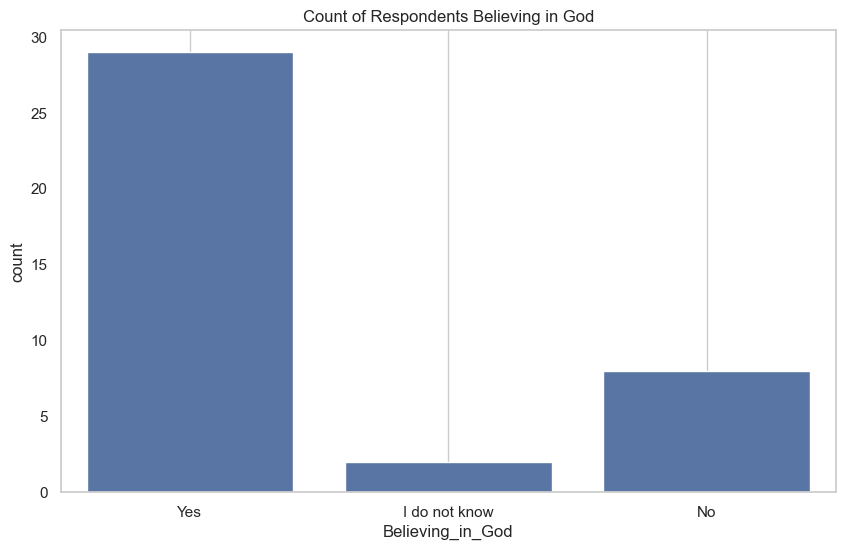

In [735]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Believing_in_God', data=data)
plt.title('Count of Respondents Believing in God')
plt.grid()
plt.show()

## Belief_Probability Study

I am going to pick "Belief_Probability" column to continue with this study.

We want to find a way that people has a higher Belief Probability about Jesus wanting to have a personal relationship with them. In this study we will look for the features that impacts in the belief.

### Q-Q Plot of Belief Probability

We checked already the P value of the Belief_Probability:

- 'Belief_Probability': NormaltestResult(statistic=39.77070205003388, pvalue=**2.311541948288333e-09**)

Being greater than 0.05 points us to be normally distributed, still it is nice to see the Q-Q chart:

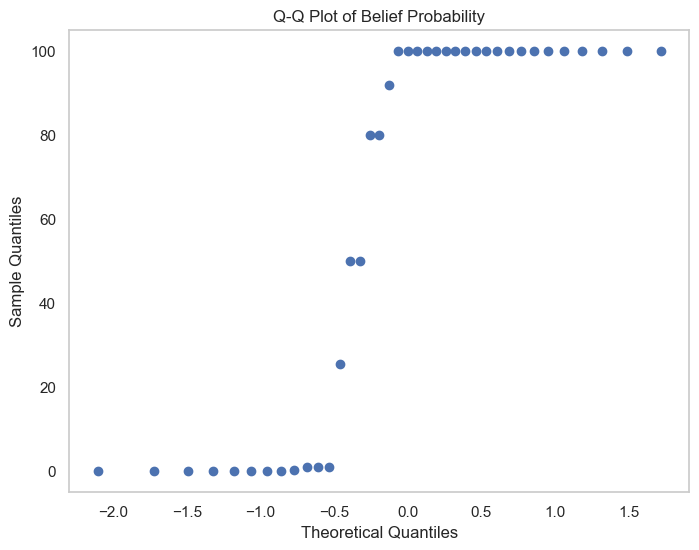

In [736]:
import scipy.stats as stats

# Creating a Q-Q plot for the 'Belief_Probability'
plt.figure(figsize=(8, 6))
stats.probplot(data['Belief_Probability'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Belief Probability')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid()
plt.show()

In this case we see that it is clustering in both tail and top with a lower concentration of points in the middle showing us that there might be some outliers that can cause some skew our analysis.

### Histogram with Overlay Curve: Belief Probability

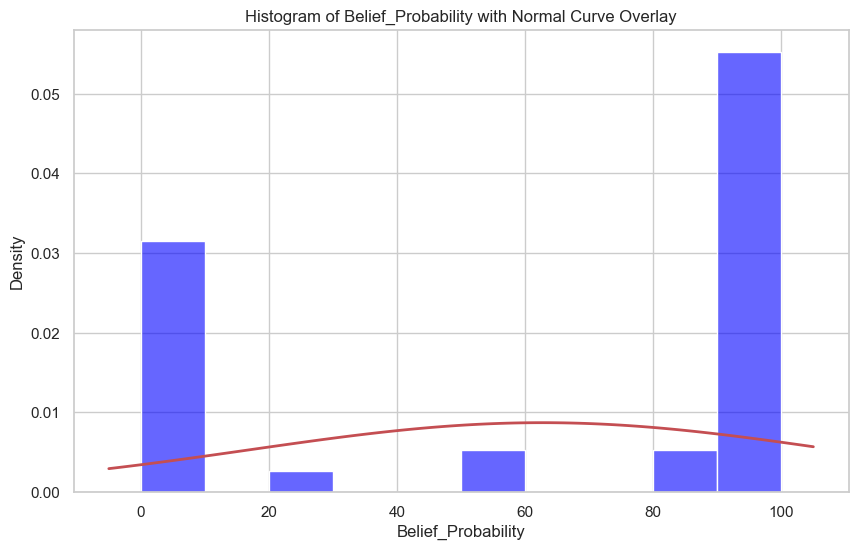

In [ ]:
from scipy.stats import norm
 
#  Calculate mean and standard deviation
mean_age = data['Belief_Probability'].mean()
std_age = data['Belief_Probability'].std()

plt.figure(figsize=(10, 6))

# Histogram
sns.histplot(data['Belief_Probability'], bins=10, kde=False, color='blue', stat='density', alpha=0.6)

# Create a range for the normal curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_age, std_age)

# Overlay the normal curve
plt.plot(x, p, 'r-', linewidth=2)

plt.title('Histogram of Belief_Probability with Normal Curve Overlay')
plt.xlabel('Belief_Probability')
plt.ylabel('Density')
plt.show()

At first sight **Belief_Probability** Seems to be very high in this dataset, let's see it with a Pie Chart:

### Pie chart: Belief Probability

In [738]:
# Categorize Belief_Probability into bins
bins = [0, 33, 66, 100]
labels = ['Low', 'Medium', 'High']
data['Belief_Category'] = pd.cut(data['Belief_Probability'], bins=bins, labels=labels)

# Count
belief_counts = data['Belief_Category'].value_counts()
belief_counts


Belief_Category
High      23
Low        9
Medium     2
Name: count, dtype: int64

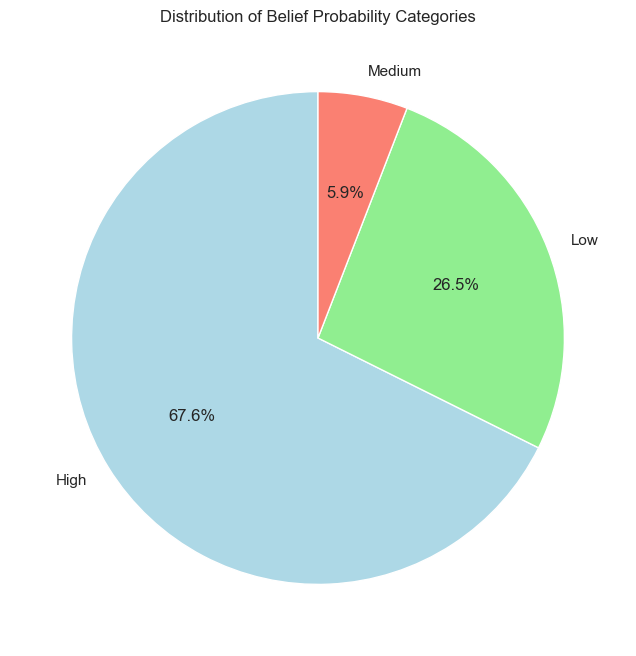

In [739]:
# Plot it
plt.figure(figsize=(8, 8))
plt.pie(belief_counts, labels=belief_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'salmon'])
plt.title('Distribution of Belief Probability Categories')

plt.show()


Very nice insights, now, lets see if we can find the cause of having a high probability of believing that God wants to have a personal relationship with each and every person. There must be a pattern...

### Belief Probability vs. Current Age

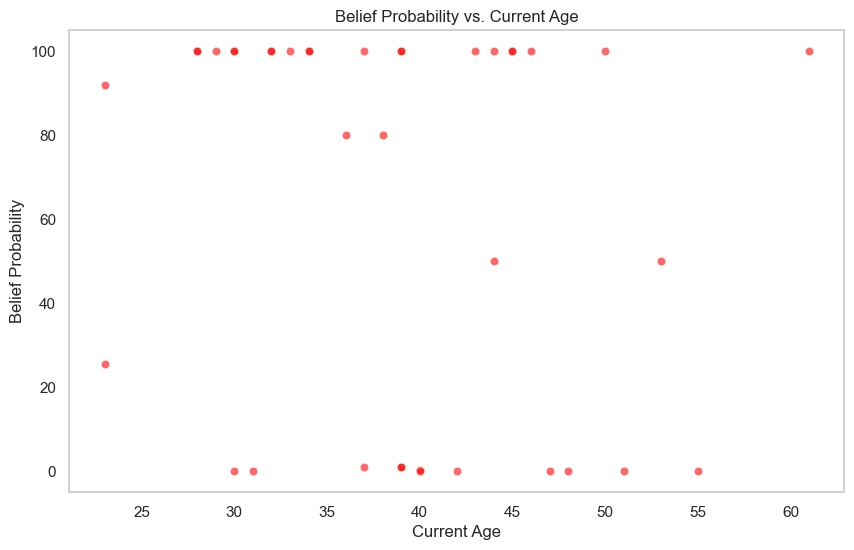

In [740]:
# Belief Probability vs. Current Age
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Current_Age', y='Belief_Probability', alpha=0.6, color='red')
plt.title('Belief Probability vs. Current Age')
plt.xlabel('Current Age')
plt.ylabel('Belief Probability')
plt.grid()
plt.show()

Belief Probability vs. Current Age doesnt look like to have a correlation at all, maybe when people were kids? Lets see then...

### Belief Probability vs. First Heard of Jesus

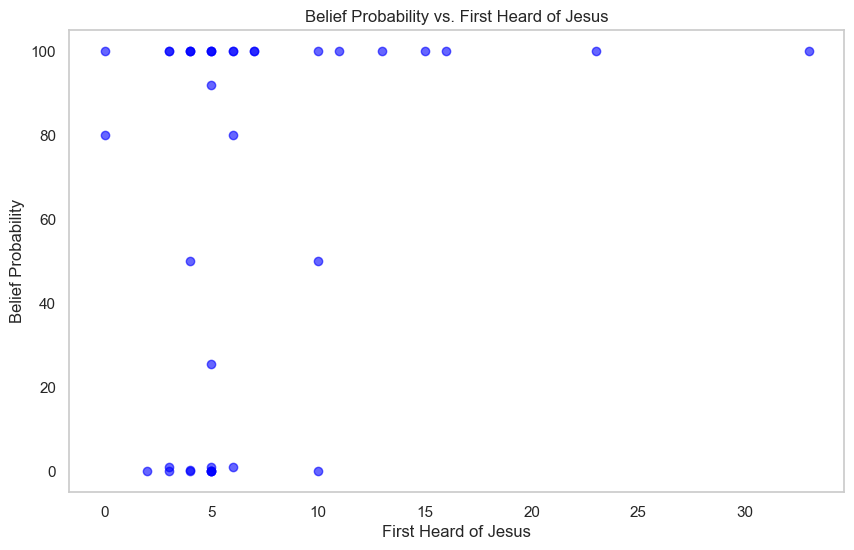

In [741]:
plt.figure(figsize=(10, 6))
plt.scatter(data['First_Heard_of_Jesus'], data['Belief_Probability'], alpha=0.6, color='blue')
plt.title('Belief Probability vs. First Heard of Jesus')
plt.xlabel('First Heard of Jesus')
plt.ylabel('Belief Probability')
plt.grid()
plt.show()


It is not very clear, lets go a little bit deeper with a custom Box Plot.

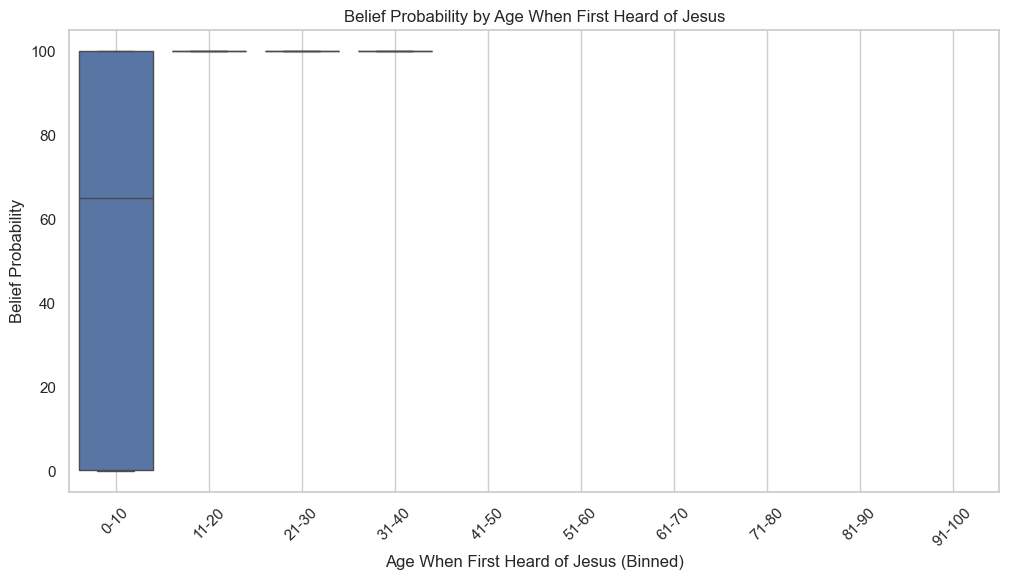

In [742]:
# Lets create some bins for First_Heard_of_Jesus
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
data['First_Hearing_Bin'] = pd.cut(data['First_Heard_of_Jesus'], bins=bins, labels=labels)

# Box plotting it
plt.figure(figsize=(12, 6))
sns.boxplot(x='First_Hearing_Bin', y='Belief_Probability', data=data)
plt.title('Belief Probability by Age When First Heard of Jesus')
plt.xlabel('Age When First Heard of Jesus (Binned)')
plt.ylabel('Belief Probability')
plt.grid()
plt.xticks(rotation=45)
plt.show()


Amazing results, lets analyze them:

Belief Probability increases drastically the sooner the person heards about Jesus, as we can see in this chart, the biggest plot Mean is above 60%. This shows that more than 60% of people that heard about Jesus between birth until the age of 10 will have a higher probability of a higher Belief Probability that Jesus wants to be in their life.

### Belief Probability by Parents’ Belief

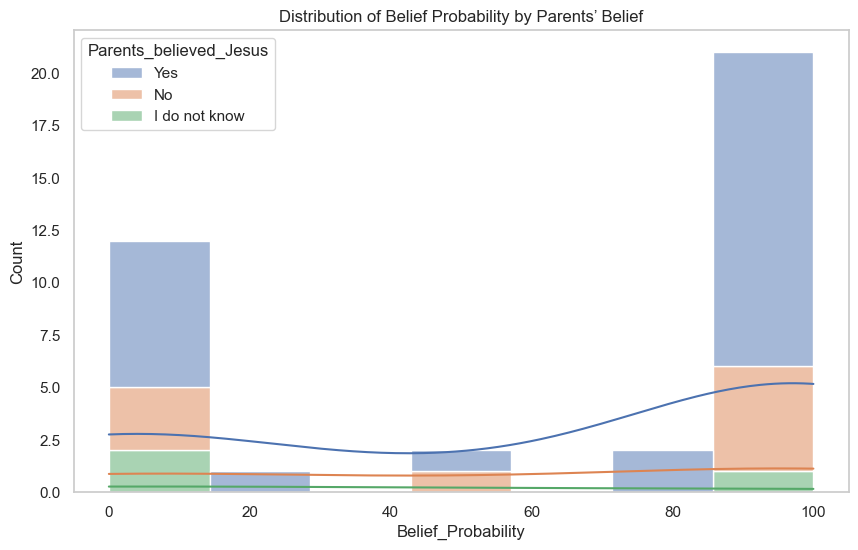

In [743]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Belief_Probability', hue='Parents_believed_Jesus', multiple='stack', kde=True)
plt.title('Distribution of Belief Probability by Parents’ Belief')
plt.grid()
plt.show()


This looks exactly to our first Histogram of Belief_Probability with Normal Curve Overlay. Making parents having a high impact in the Belief Probability of the person.

### Bar chart: with variability whiskers

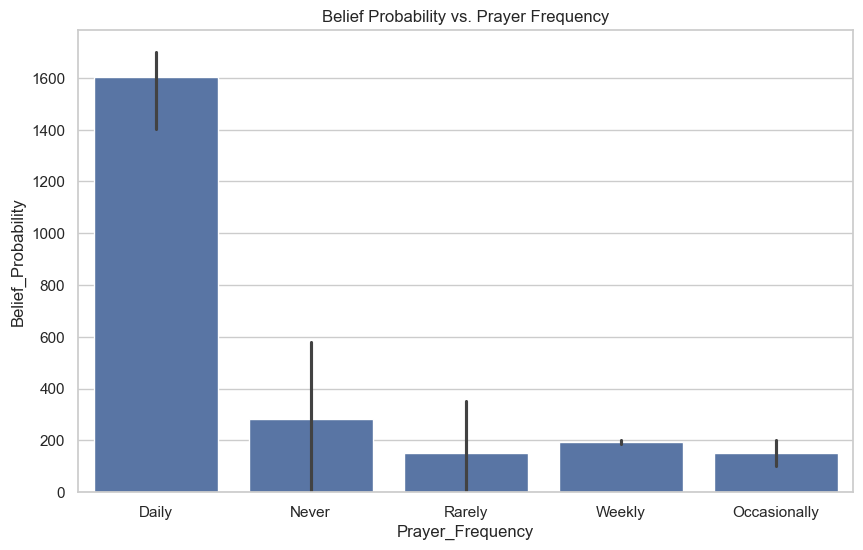

In [744]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Prayer_Frequency', y='Belief_Probability', data=data, estimator=sum)
plt.title('Belief Probability vs. Prayer Frequency')
plt.show()


Interesting enough, people that prays daily has a higher Belief Probability. Maybe faith comes by action.

It still worth mentioning that even people that never pray still have a higher Belief Probability than those who goes to church weekly on Saturdays or Sunday...

It drew my attention enough, lets see if we find out something.

### Belief Probability vs. Prayer Frequency Study

- 1. We will count how many responses we have for each Prayer Frequency type.
- 2. We will get the Average Belief Probability by Prayer Frequency.
- 3. We will see the distribution of Belief Probability by Prayer Frequency.

Conclusions.

C:\Users\gabri\AppData\Local\Temp\ipykernel_26436\524361295.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Prayer_Frequency', data=data, palette='pastel')


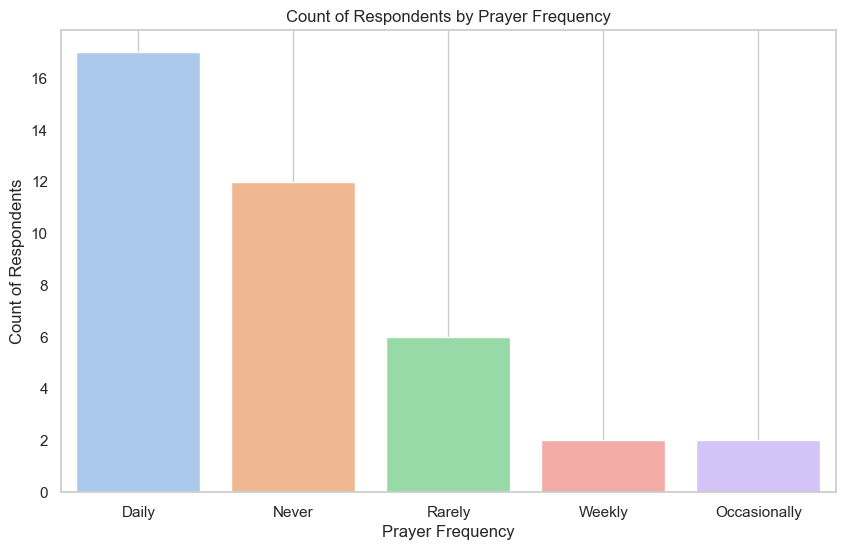

C:\Users\gabri\AppData\Local\Temp\ipykernel_26436\524361295.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Prayer_Frequency', y='Belief_Probability', data=mean_belief, palette='viridis')


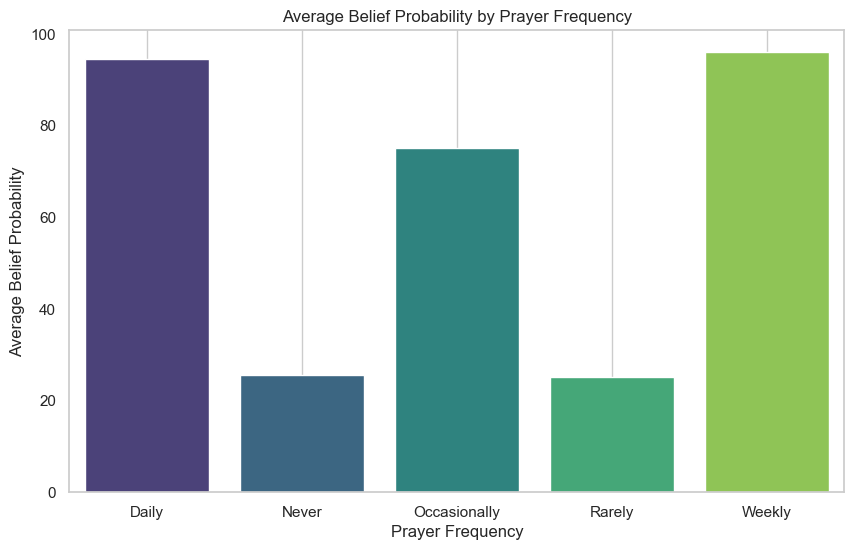

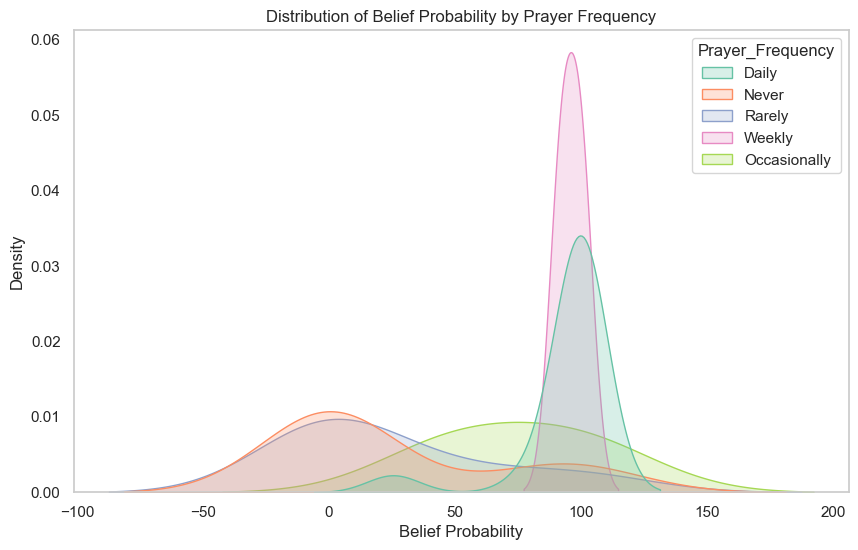

In [745]:
# 1. Count Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Prayer_Frequency', data=data, palette='pastel')
plt.title('Count of Respondents by Prayer Frequency')
plt.xlabel('Prayer Frequency')
plt.ylabel('Count of Respondents')
plt.grid()
plt.show()

# 2. Bar plot
# AVG Belief_Probability for each Prayer_Frequency
mean_belief = data.groupby('Prayer_Frequency')['Belief_Probability'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Prayer_Frequency', y='Belief_Probability', data=mean_belief, palette='viridis')
plt.title('Average Belief Probability by Prayer Frequency')
plt.xlabel('Prayer Frequency')
plt.ylabel('Average Belief Probability')
plt.grid()
plt.show()

# 3. Kdeplot (Distribution)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='Belief_Probability', hue='Prayer_Frequency', common_norm=False, fill=True, palette='Set2')
plt.title('Distribution of Belief Probability by Prayer Frequency')
plt.xlabel('Belief Probability')
plt.ylabel('Density')
plt.grid()
plt.show()


- 1. First thing we find out is that, actually there are a huge amount of responses that selected the "Never" option. That made the case of why it showed that many people still without having a prayer routine fell into the category of having a high Belief Probability, in our dataset the Belief Probability is high regardless. Still there is the question of why if people never pray still have a high Belief Probability in the context of this dataset?
- 2. and 3. We see that people who go to church weekly (pray weekly) or pray daily have a high Belief Probability, making more sense with the result than this of "Never praying".

### Belief Probability Distribution by Gender

C:\Users\gabri\AppData\Local\Temp\ipykernel_26436\3645296615.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Belief_Probability', data=data, palette='Set2')


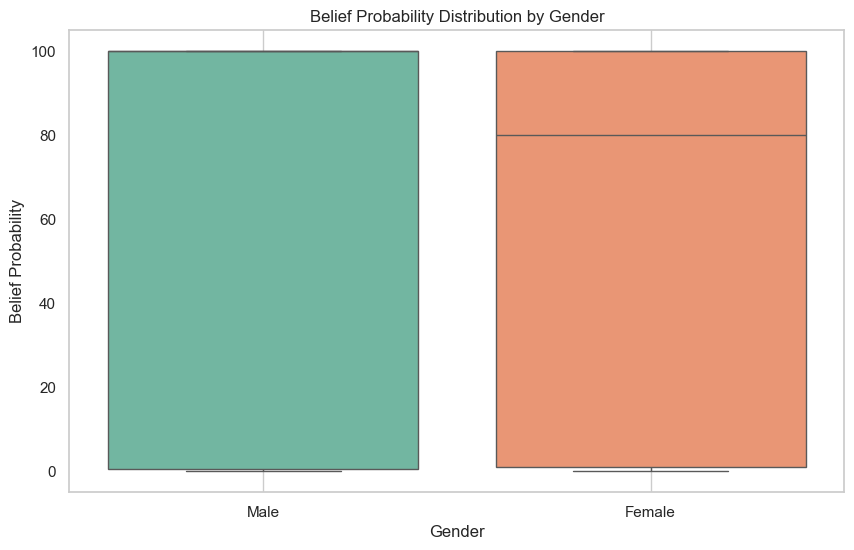

In [746]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Belief_Probability', data=data, palette='Set2')
plt.title('Belief Probability Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Belief Probability')
plt.grid()
plt.show()


At first sight we see they are almost the same. We can se that the Female Mean is around 80% but we dont see the male one. lets have a deeper view using the mean.

C:\Users\gabri\AppData\Local\Temp\ipykernel_26436\2353320966.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Belief_Probability', data=gender_belief_avg, palette='viridis')


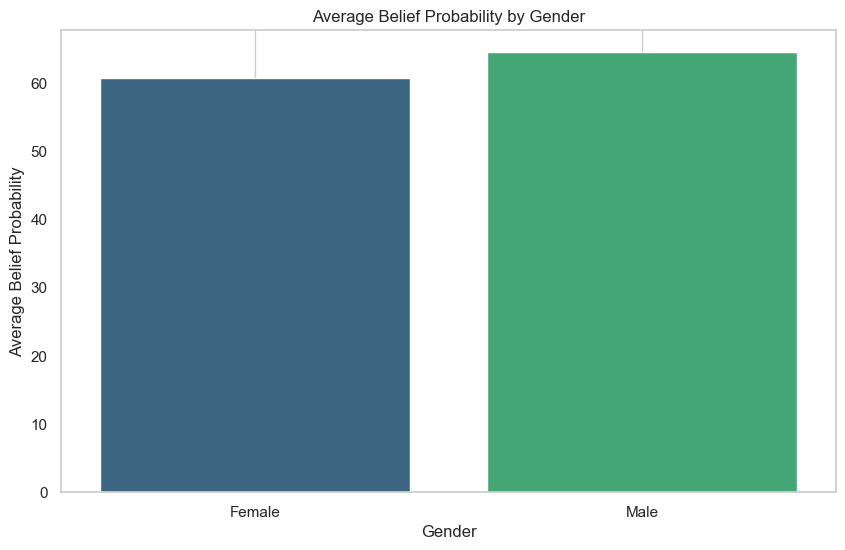

In [747]:
# Mean
gender_belief_avg = data.groupby('Gender')['Belief_Probability'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Belief_Probability', data=gender_belief_avg, palette='viridis')
plt.title('Average Belief Probability by Gender')
plt.ylabel('Average Belief Probability')
plt.xlabel('Gender')
plt.grid()
plt.show()


This chart shows now that Males have a slighter higher Belief Probability than Females, now knowing this, lets ask this question...

### Who prays more? Female or Male?

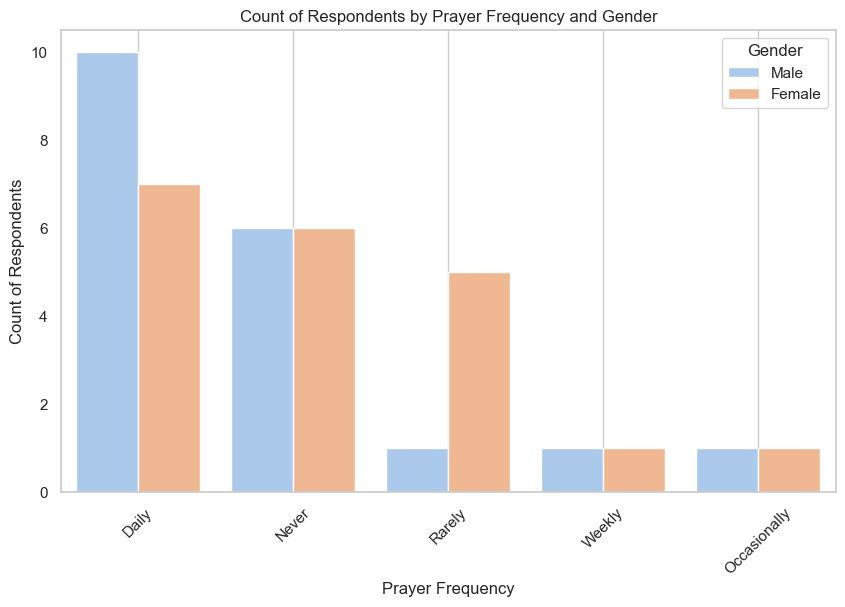

C:\Users\gabri\AppData\Local\Temp\ipykernel_26436\1471627800.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Gender', palette='pastel')


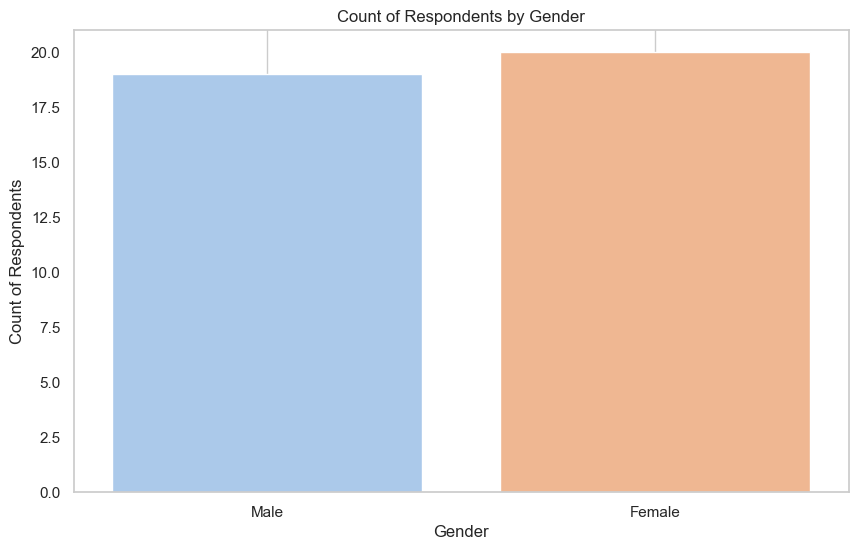

In [748]:
# Who prays more? Female or Male?
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Prayer_Frequency', hue='Gender', palette='pastel')
plt.title('Count of Respondents by Prayer Frequency and Gender')
plt.xlabel('Prayer Frequency')
plt.ylabel('Count of Respondents')
plt.grid()
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.show()

# Count Female Vs Male Respondants
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Gender', palette='pastel')
plt.title('Count of Respondents by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Respondents')
plt.grid()
plt.show()


Interesting that there were more Females respondents but still Males pray more than Females.

### Belief Probability by Nationality

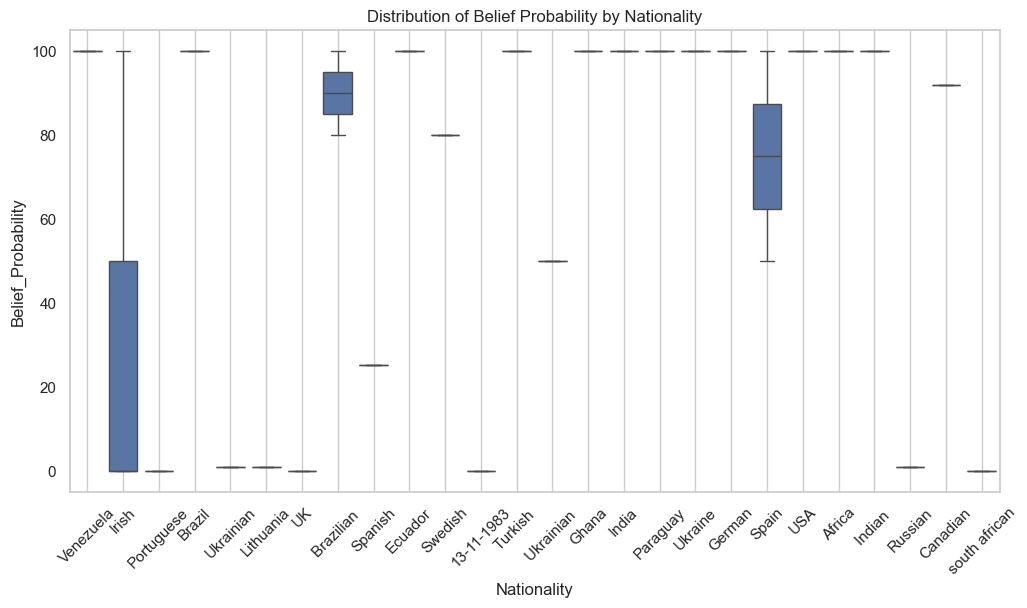

In [749]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Nationality', y='Belief_Probability', data=data)
plt.title('Distribution of Belief Probability by Nationality')
plt.xticks(rotation=45)
plt.grid()
plt.show()


Thanks to this Box Plot we se that most respondents were Irish, following by Spanish and Brazilians. Something that draws my attention is the low Belief Probability Irish people have but, there is a big but, there is a huge line showing some unexpected outliers that comes out of the top of the Box. Maybe that is what the Q-Q Plot was warning us about.

First, we will plot these countries grouped by the 5 continents of the world and then we will see what is happening in Ireland.

In [750]:
# Nationalities/Countries to continents
nationality_to_continent = {
    'Venezuela': 'South America',
    'Irish': 'Europe',
    'Portuguese': 'Europe',
    'Brazil': 'South America',
    'Ukrainian': 'Europe',
    'Lithuania': 'Europe',
    'UK': 'Europe',
    'Brazilian': 'South America',
    'Spanish': 'Europe',
    'Ecuador': 'South America',
    'Swedish': 'Europe',
    'Turkish': 'Asia',
    'Ghana': 'Africa',
    'India': 'Asia',
    'Paraguay': 'South America',
    'Ukraine': 'Europe',
    'German': 'Europe',
    'Spain': 'Europe',
    'USA': 'North America',
    'Africa': 'Africa',
    'Canadian': 'North America',
    'South African': 'Africa',
    'Russian': 'Europe',
}

# Mapping them into a new column of the dataset
data['Continent'] = data['Nationality'].map(nationality_to_continent)


C:\Users\gabri\AppData\Local\Temp\ipykernel_26436\1923652771.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Continent', palette='pastel', order=data['Continent'].value_counts().index)


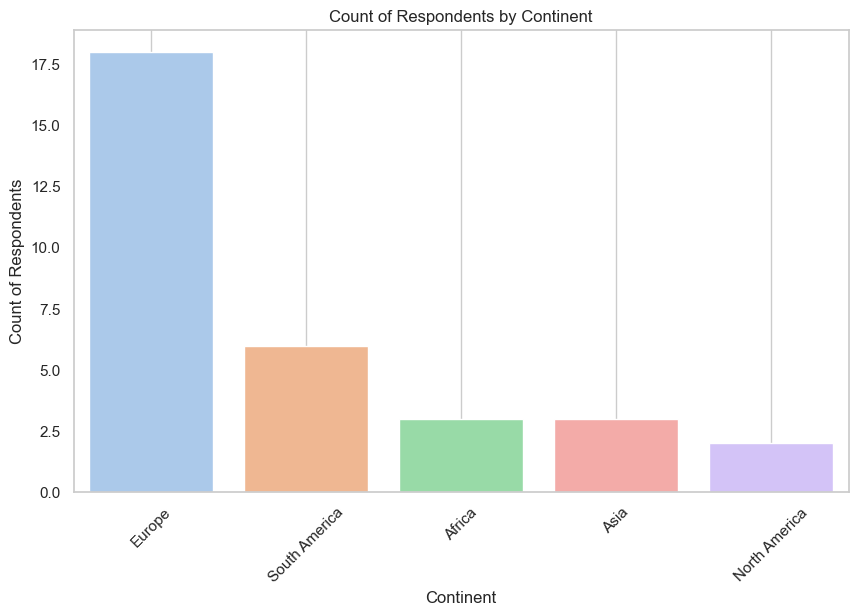

In [751]:
# Respondents by continent
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Continent', palette='pastel', order=data['Continent'].value_counts().index)
plt.title('Count of Respondents by Continent')
plt.xlabel('Continent')
plt.ylabel('Count of Respondents')
plt.xticks(rotation=45)
plt.grid()
plt.show()


As expected, Europe has the most Count of Respodents.

Lets filter the dataset for Irish respondents

Because of time we will stop analysing this valuable dataset, although there is so many things we could continue doing with it.

Thanks to all these following plots we can see the final picture we have been trying to draw along this document, lets jump ahead with our conclusion while analysing the Irish Plots:

In [752]:
irish_data = data[data['Nationality'] == 'Irish']

C:\Users\gabri\AppData\Local\Temp\ipykernel_26436\288229302.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=irish_data, x='Gender', palette='pastel')


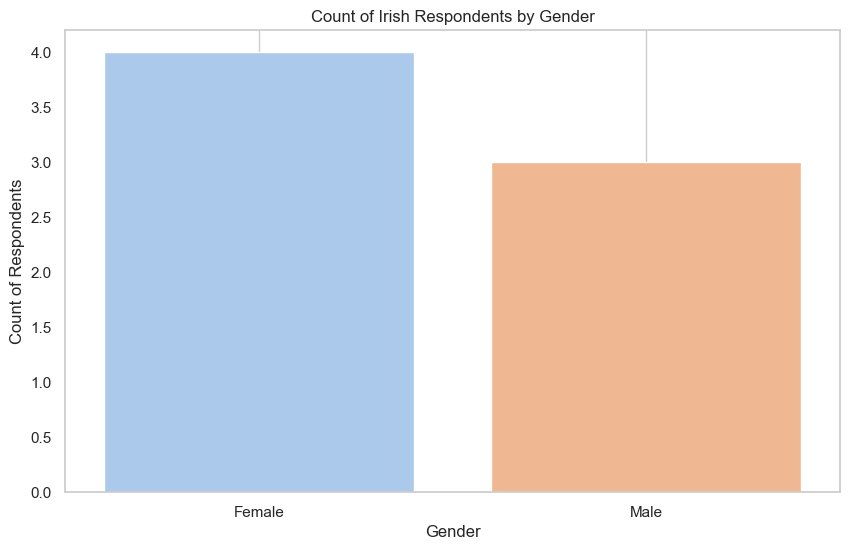

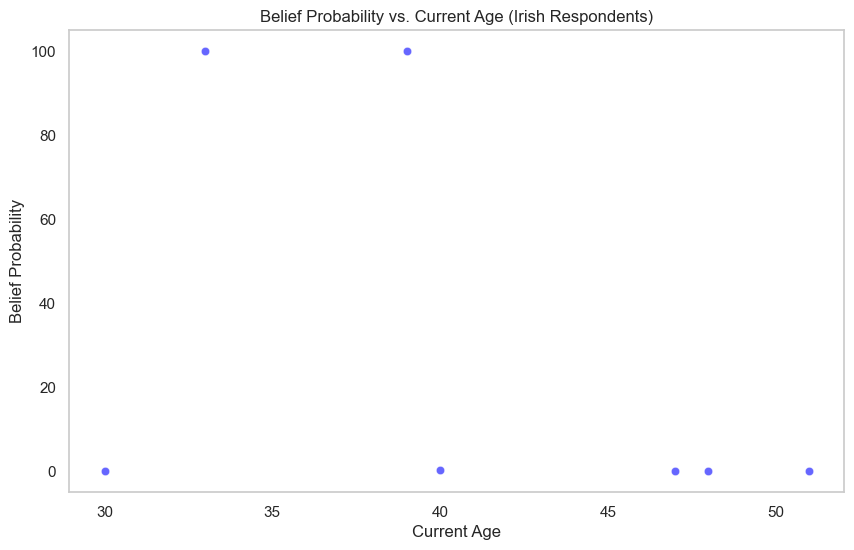

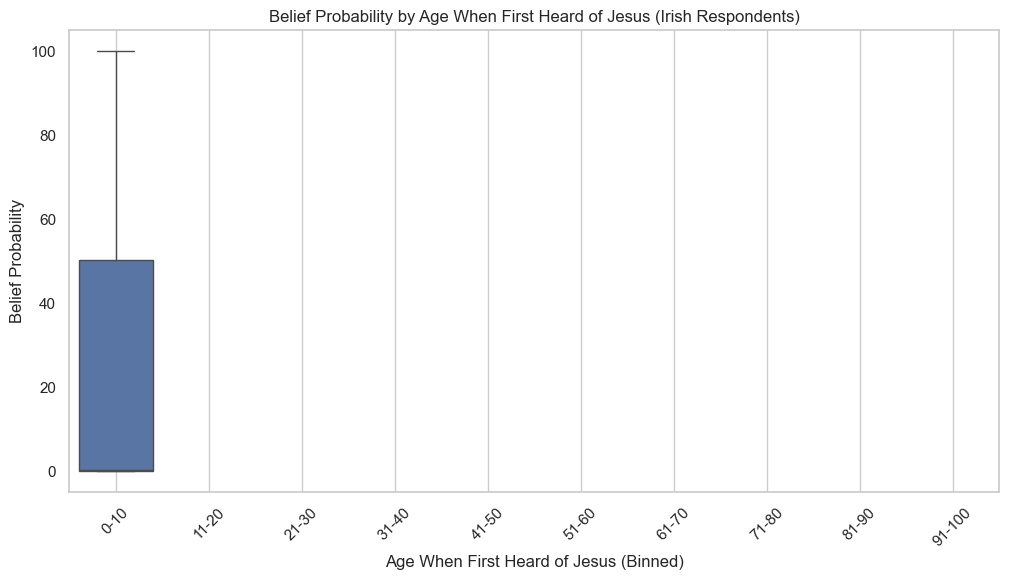

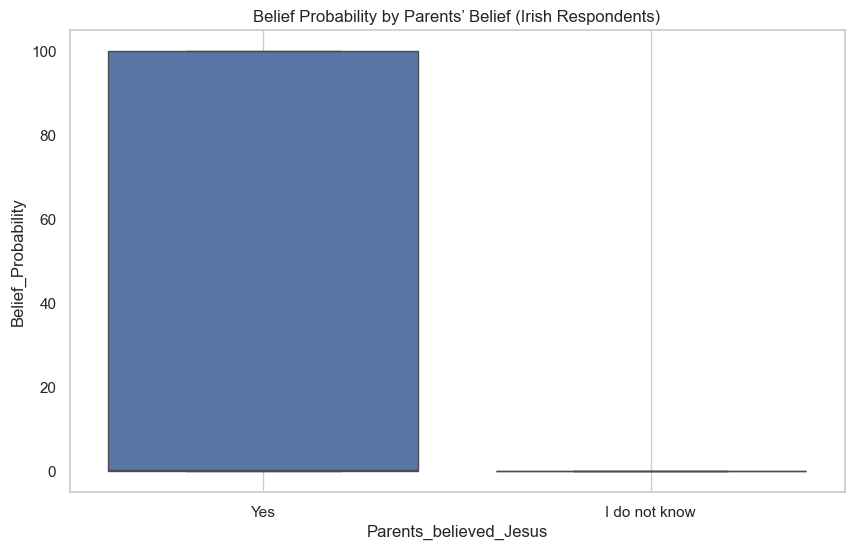

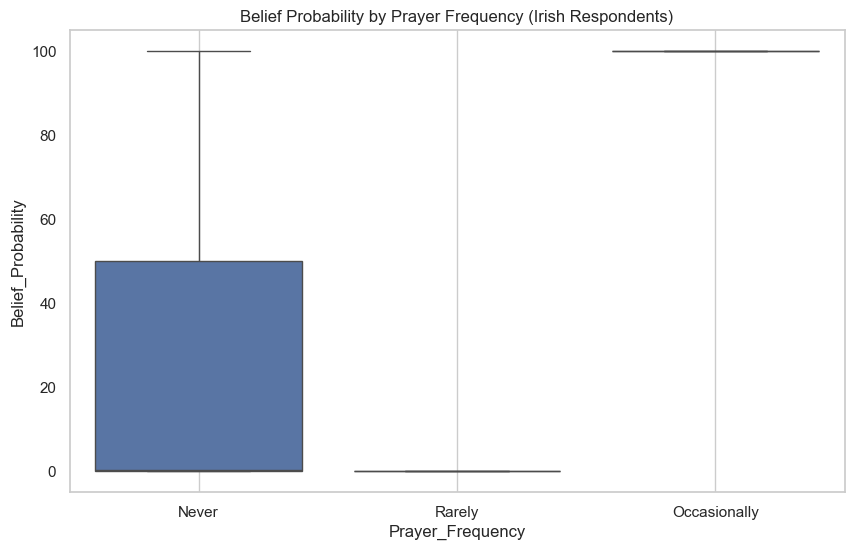

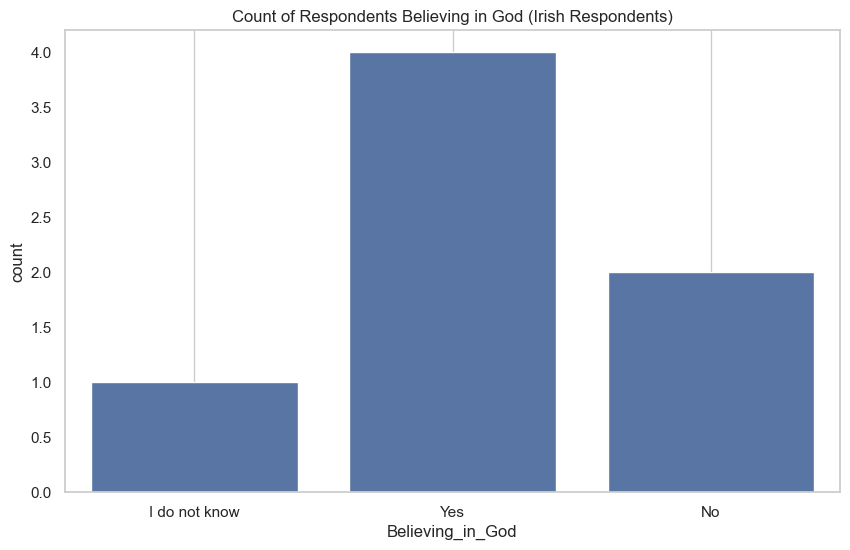

In [753]:
# Female Vs Male Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=irish_data, x='Gender', palette='pastel')
plt.title('Count of Irish Respondents by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Respondents')
plt.grid()
plt.show()

# Belief Probability vs. Current Age
plt.figure(figsize=(10, 6))
sns.scatterplot(data=irish_data, x='Current_Age', y='Belief_Probability', alpha=0.6, color='blue')
plt.title('Belief Probability vs. Current Age (Irish Respondents)')
plt.xlabel('Current Age')
plt.ylabel('Belief Probability')
plt.grid()
plt.show()

# Lets create some bins for First_Heard_of_Jesus
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
data['First_Hearing_Bin'] = pd.cut(data['First_Heard_of_Jesus'], bins=bins, labels=labels)

# Box plotting it
plt.figure(figsize=(12, 6))
sns.boxplot(x='First_Hearing_Bin', y='Belief_Probability', data=irish_data)
plt.title('Belief Probability by Age When First Heard of Jesus (Irish Respondents)')
plt.xlabel('Age When First Heard of Jesus (Binned)')
plt.ylabel('Belief Probability')
plt.grid()
plt.xticks(rotation=45)
plt.show()

# Belief Probability by Parents’ Belief
plt.figure(figsize=(10, 6))
sns.boxplot(x='Parents_believed_Jesus', y='Belief_Probability', data=irish_data)
plt.title('Belief Probability by Parents’ Belief (Irish Respondents)')
plt.grid()
plt.show()

# Belief Probability by Prayer Frequency
plt.figure(figsize=(10, 6))
sns.boxplot(x='Prayer_Frequency', y='Belief_Probability', data=irish_data)
plt.title('Belief Probability by Prayer Frequency (Irish Respondents)')
plt.grid()
plt.show()

# Respondents Believing in God
plt.figure(figsize=(10, 6))
sns.countplot(x='Believing_in_God', data=irish_data)
plt.title('Count of Respondents Believing in God (Irish Respondents)')
plt.grid()
plt.show()



## Conclusion:

- Most respondents were Females but Males are the ones who has a higher Belief_Probability. Making being born male a key factor of a person having a high Belief_Probability.

- Belief Probability vs. Current Age doesn't have any correlation at all but an early stage, from 0 until 10 years old, the study of the Scriptures guarantees a higher Belief_Probability for that person in their adult life.

- Now, talking about the parents, the parents have a huge impact on their kid's Belief_Probability. The Parents Belief distribution is almost identical to the whole dataset Belief_Probability distribution and we see the same here with the Irish people. We need more committed parents in the development of their kids' relationship with Jesus if we want to see an increase in the Belief_Probability.

- Prayer Frequency: Something that stands out in this dataset. Males pray more frequently than females and pray frequency shifts drastically a person's Belief_Probability. Creating ways in which people engage in prayer will secure growth in the Belief_Probability of the individual.

- Interestingly enough the majority of people believe in God, whether they have a high Belief_Probability, a prayer plan, a different Nationality, or any understanding of Jesus Christ. By knowing this we can potentially find an opportunity to make that person follow a prayer routine in their life boosting their Belief_Probability.

**In summary**, this study highlights the importance of an early stage of faith exposure, family influence, and prayer frequency in shaping belief probability of a person.


## References

Atlassian (2024). A Complete Guide to Box Plots. [online] Atlassian. Available at: https://www.atlassian.com/data/charts/box-plot-complete-guide.

Frost, J. (2021). Interquartile Range (IQR): Definition and Uses. [online] Statistics By Jim. Available at: https://statisticsbyjim.com/basics/interquartile-range/.

Mulani, S. (2022). Seaborn Kdeplot - A Comprehensive Guide | DigitalOcean. [online] www.digitalocean.com. Available at: https://www.digitalocean.com/community/tutorials/seaborn-kdeplot.

Taylor, S. (2023). Skewness. [online] Corporate Finance Institute. Available at: https://corporatefinanceinstitute.com/resources/data-science/skewness/.

Team, E. (2024). All About Normality Test in Statistical Analysis. [online] SixSigma.us. Available at: https://www.6sigma.us/six-sigma-in-focus/normality-test-lean-six-sigma/.

Turney, S. (2022). What Is Kurtosis? | Definition, Examples & Formula. [online] Scribbr. Available at: https://www.scribbr.com/statistics/kurtosis/.

Yi, M. (2024). A Complete Guide to Bar Charts. [online] Atlassian. Available at: https://www.atlassian.com/data/charts/bar-chart-complete-guide.